pip install spacy

pip install tensorflow

pip install nltk

In [1]:
import pandas as pd
import numpy as np
import spacy
import nltk

In [136]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

## Data Analysis

In [3]:
def read_data(filename, type = "csv", print_data = False):
    if(type == "csv"):
        data = pd.read_csv(filename)
        
        data_df = pd.DataFrame(data)
        if print_data :
            print(data_df.head(20))
        return data_df
    elif (type == "excel"):
        data = pd.read_excel(filename)
        data_df = pd.DataFrame(data)
        if print_data : 
            print(data_df.head(20))
        return data_df

In [4]:
datapath = "C:\\Documents\\Masters\\Third Semester\\NLP\\NLP_Project\\Project\\Data\\track-a.csv"
track_a = read_data(datapath)

In [5]:
track_a

,id,text,anger,fear,joy,sadness,surprise
0,eng_train_track_a_00001,"Colorado, middle of nowhere.",0,1,0,0,1
1,eng_train_track_a_00002,This involved swimming a pretty large lake tha...,0,1,0,0,0
2,eng_train_track_a_00003,It was one of my most shameful experiences.,0,1,0,1,0
3,eng_train_track_a_00004,"After all, I had vegetables coming out my ears...",0,0,0,0,0
4,eng_train_track_a_00005,Then the screaming started.,0,1,0,1,1
...,...,...,...,...,...,...,...
2763,eng_train_track_a_02764,She cants her hip against my waist into my sid...,0,0,1,0,1
2764,eng_train_track_a_02765,"I then did the dishes, whitened my teeth, watc...",0,0,0,0,0
2765,eng_train_track_a_02766,It just kind of gradually vanished over a coup...,0,0,0,0,1
2766,eng_train_track_a_02767,I didn't look out of my hands.,0,1,0,0,0


In [17]:
def plot_data(data, plot_type = "line"):
    if plot_type == "bar" :
        plt.bar(data.index, data)
        plt.show
    else :
        plt.plot(data)
        plt.show

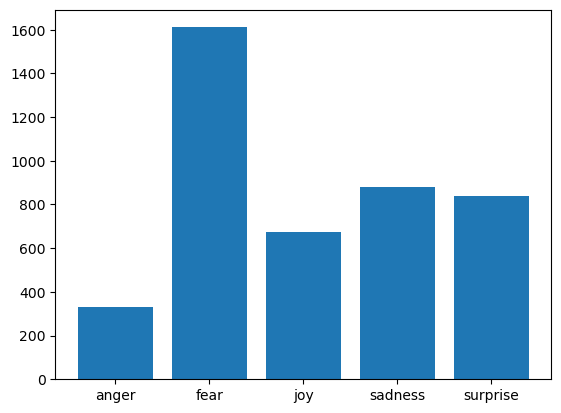

In [18]:
plot_data(track_a.sum()[2:], "bar")

## Train Test Split

In [30]:
X = track_a.iloc[:, 1]
y = track_a.iloc[:, 2:]
test_size = 0.20

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= test_size, random_state= 42)

## Training Model

In [35]:
def multinomialNB_classifier(X_train, y_train): 
    model = make_pipeline(
        TfidfVectorizer(),
        OneVsRestClassifier(MultinomialNB())
    )
    model.fit(X_train, y_train)
    return model

In [36]:
def predict_labels (model, X_test):
    return model.predict(X_test)

In [37]:
model_NB = multinomialNB_classifier(X_train, y_train)

In [47]:
pred = model_NB.predict([X_test.iloc[3]])
print(X_test.iloc[2])
print(pred)

Finding them, I whipped one out and put it in my ear, swabbing.
[[0 1 0 0 0]]


In [114]:
y_pred = model_NB.predict(X_test)

In [173]:
def calculate_results(y_test, y_pred) : 
    result_dict = {}
    result_dict["accuracy"] = accuracy_score(y_test, y_pred)
    
    # F1-score (macro = treats all labels equally, micro = global average)
    result_dict[ "f1_micro" ] = f1_score(y_test, y_pred, average='micro')
    result_dict ["f1_macro"] = f1_score(y_test, y_pred, average='macro')
    
    # Detailed classification report
    result_dict ["report"] = classification_report(y_test, y_pred, target_names=["anger","fear","joy","sadness","surprise"])

    return result_dict

In [176]:
def accuracy_per_label(y_test, y_pred):
    accuracies = []
    labels = ["anger", "fear", "joy", "sadness", "surprise"] 
    for i in range(5):
        accuracies.append( accuracy_score(y_test.iloc[:,i], y_pred[:,i]))
        
        print(F"Accuracy {labels[i]}: {accuracies[i] }")
    return accuracies

In [ ]:
results = calculate_results(y_test, y_pred)

In [178]:
accuracies = accuracy_per_label(y_test, y_pred)

Accuracy anger: 0.8700361010830325
Accuracy fear: 0.6389891696750902
Accuracy joy: 0.7942238267148014
Accuracy sadness: 0.7003610108303249
Accuracy surprise: 0.6823104693140795


In [164]:
accuracy_score(y_test,y_pred)
print(accuracy)
print( np.mean(accuracies))

0.1624548736462094
0.7371841155234657


In [145]:
print(f1_micro)
print(f1_macro)

0.4716981132075472
0.1712754540588825


In [121]:
print(report)

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        72
        fear       0.63      0.96      0.76       330
         joy       1.00      0.01      0.02       115
     sadness       0.57      0.02      0.05       167
    surprise       1.00      0.02      0.03       179

   micro avg       0.63      0.38      0.47       863
   macro avg       0.64      0.20      0.17       863
weighted avg       0.69      0.38      0.31       863
 samples avg       0.57      0.35      0.41       863



In [158]:
from sklearn.metrics import confusion_matrix

In [160]:
confusion_matrix(y_test.iloc[:,0], y_pred[:,0])

array([[482,   0],
       [ 72,   0]])

In [162]:
482/554

0.8700361010830325

In [19]:
track_a.sum()

id          eng_train_track_a_00001eng_train_track_a_00002...
text        Colorado, middle of nowhere.This involved swim...
anger                                                     333
fear                                                     1611
joy                                                       674
sadness                                                   878
surprise                                                  839
dtype: object

## Trying Logistic Regression

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [186]:
clf = MultiOutputClassifier(LogisticRegression(solver='liblinear'))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
clf.fit(X_train_tfidf, y_train)
y_pred_lr = clf.predict(X_test_tfidf)

In [188]:

accuracies_lr = accuracy_per_label(y_test, y_pred_lr)

Accuracy anger: 0.8700361010830325
Accuracy fear: 0.644404332129964
Accuracy joy: 0.8014440433212996
Accuracy sadness: 0.723826714801444
Accuracy surprise: 0.7346570397111913


In [193]:
y_test

,anger,fear,joy,sadness,surprise
1378,0,1,0,0,0
839,0,1,0,0,1
2164,0,0,0,0,0
2619,0,1,0,1,0
927,0,1,0,0,0
...,...,...,...,...,...
874,0,0,1,0,0
2031,0,1,0,1,0
100,0,0,0,0,1
315,0,1,1,0,1


In [194]:
y_pred_lr

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1]], shape=(554, 5))

In [189]:
accuracy_score(y_test,y_pred_lr)
print(accuracy)
print( np.mean(accuracies_lr))

0.1624548736462094
0.7548736462093864


In [191]:
results_lr = calculate_results(y_test,y_pred_lr)
print(results_lr["f1_micro"])
print(results_lr["f1_macro"])


0.5061818181818182
0.2894000023683524


C:\Users\prati\anaconda3\envs\GenAI\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\prati\anaconda3\envs\GenAI\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\prati\anaconda3\envs\GenAI\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\prati\